# Social Defeat Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc_csvs"
brain_region = '#FFAF00'

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac_csvs"
# brain_region = '#15616F'


In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p1-240510-082326\Notes.txt
read from t=0s to t=952.19s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p2-240510-094249\Notes.txt
read from t=0s to t=922.7s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p3-240513-064912\Notes.txt
read from t=0s to t=914.45s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p4-240513-082248\Notes.txt
read from t=0s to t=929.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p5-240916-090016\Notes.txt
read from t=0s to t=861.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\mpfc\p6-240916-095652\Notes.txt
read from t=0s to t=879.75s
Found Synapse note file: C:\Users\alber\OneDriv

In [4]:
group_data.d_proc_processing()

Social Defeat Processing p1-240510-082326...
Social Defeat Processing p2-240510-094249...
Social Defeat Processing p3-240513-064912...
Social Defeat Processing p4-240513-082248...
Social Defeat Processing p5-240916-090016...
Social Defeat Processing p6-240916-095652...
Social Defeat Processing p7-240916-110418...
Social Defeat Processing p8-240916-115836...


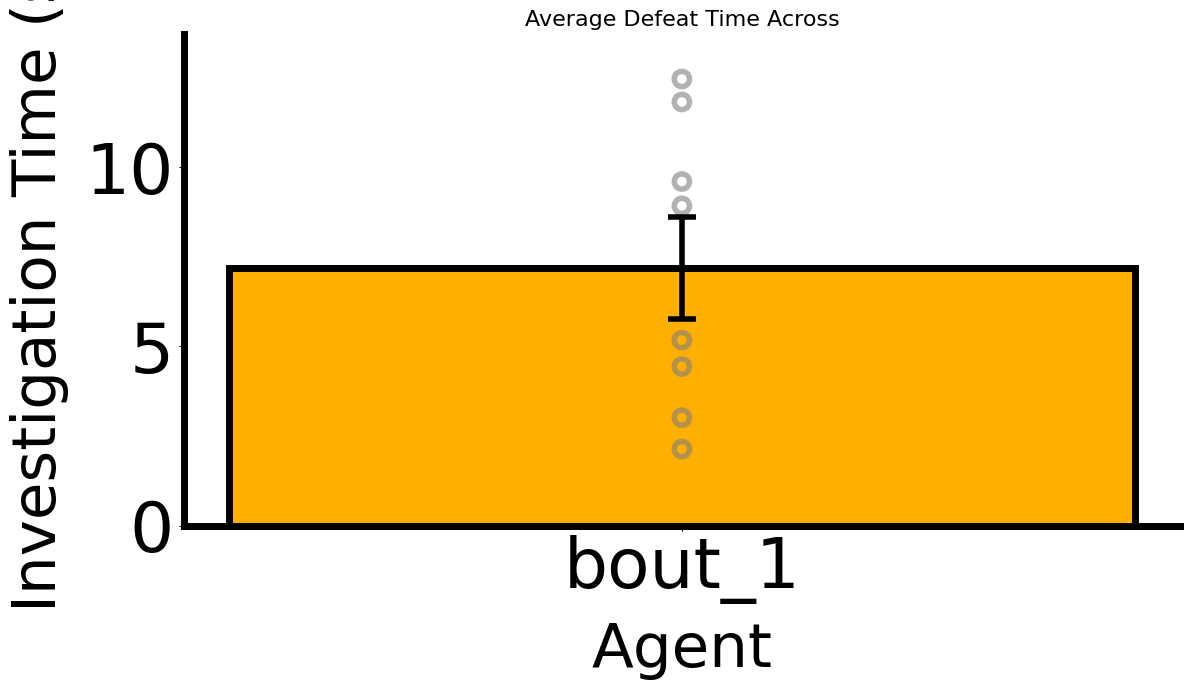

In [5]:
# Define the columns representing the bouts
columns = ['bout_1']

# Extract average investigation durations
avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts= columns, behavior='Defeat')

plot_y_across_bouts_gray(avg_inv_duration_df, 'Average Defeat Time Across','Investigation Time (s)', bar_color=brain_region)

In [6]:
avg_inv_duration_df

,bout_1
Subject,
p1,9.604533
p2,5.177667
p3,11.824875
p4,4.439900
p5,8.925000
p6,3.014286
p7,2.135294
p8,12.466667


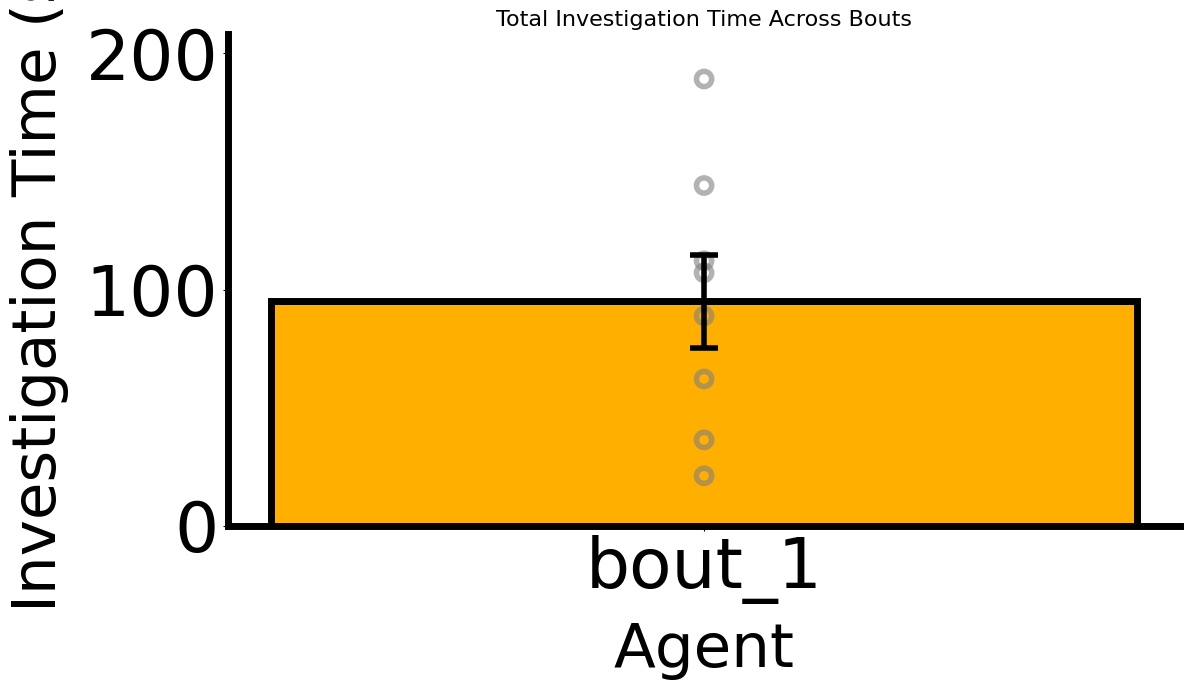

In [7]:
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Defeat')

# plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)
plot_y_across_bouts_gray(avg_inv_tot_duration_df, 'Total Investigation Time Across Bouts','Investigation Time (s)', bar_color=brain_region)

1st Defeat

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_baseline_peth(group_data=group_data, bouts=columns,
                                                          behavior='Defeat', n=1, windows=[(0, 4)], pre_time=4, post_time=4)

# plot_y_across_bouts_gray(inv_1st_mean_df, 'Standard z-score 1st Investigation (Max = 5.0s)','Mean DA (zscored dff)',  ylim = (-5,2),bar_color=brain_region)
inv_1st_mean_df


,bout_1_0s_to_4s
Subject,
p1,9.666941
p2,0.477734
p3,-1.938824
p4,0.203218
p5,0.118756
p6,2.082594
p7,2.275087
p8,1.070445


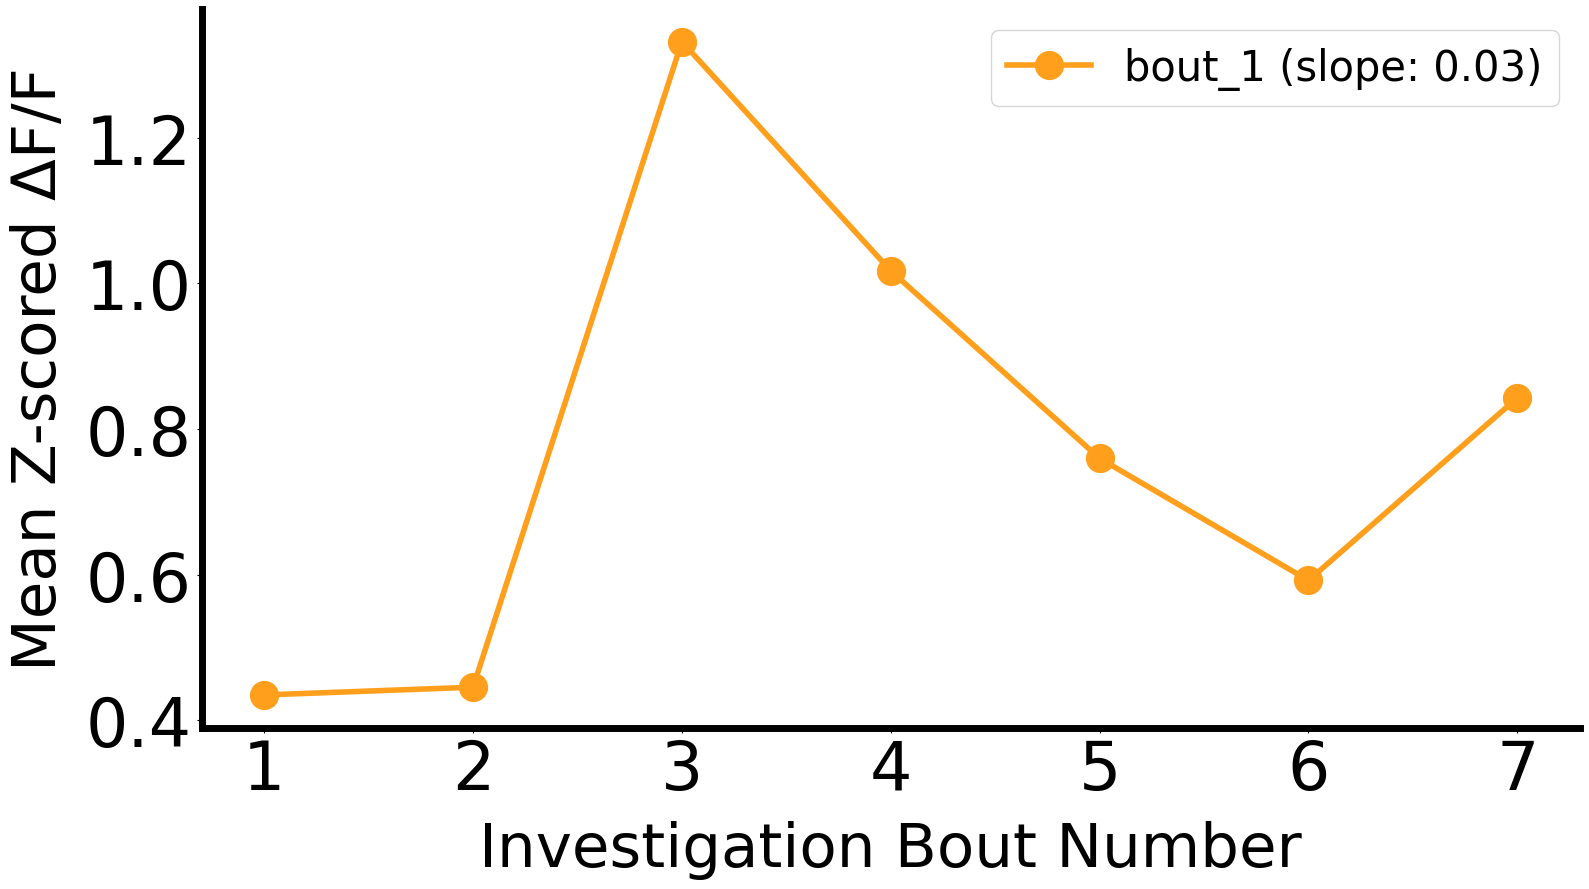

Slope for bout_1: 0.03


In [9]:
mean_da_df = extract_nth_to_mth_behavior_mean_da(group_data, columns , behavior='Defeat', n_start=1, n_end=7)
plot_meanDA_across_investigations(mean_da_df,columns, max_investigations=7, metric_type='slope',colors=custom_palette, custom_xtick_labels=['1','2','3','4','5','6','7'])

## PETH's

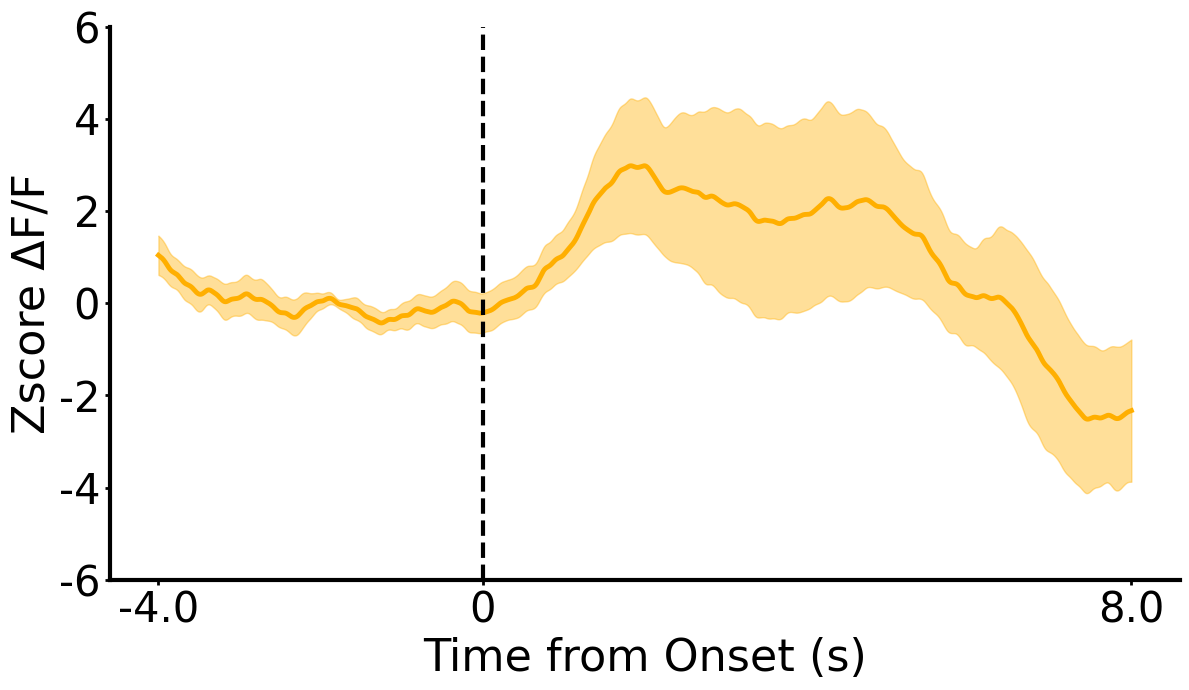

In [10]:
columns = ['bout_1']

group_data.compute_nth_bout_peth_all_blocks(behavior_name='Defeat', nth_occurrence=1, bouts=columns, pre_time=4, post_time=8, bin_size=0.1)

                                    
group_data.plot_peth_for_single_bout(signal_type='zscore', error_type='sem', title='Baseline zscore: First Defeat Across Agents',color=brain_region,
                                     bout = columns[0], display_pre_time=4, display_post_time=10, yticks_interval=2, figsize=(12, 7))

In [11]:
df = extract_nth_behavior_mean_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0, 10)])
plot_y_across_bouts_gray(df,title='Baseline zscore 1st Investigation',ylabel='Mean Value',  bar_color=brain_region,ylim=(-5,2))


NameError: name 'extract_nth_behavior_mean_peth' is not defined

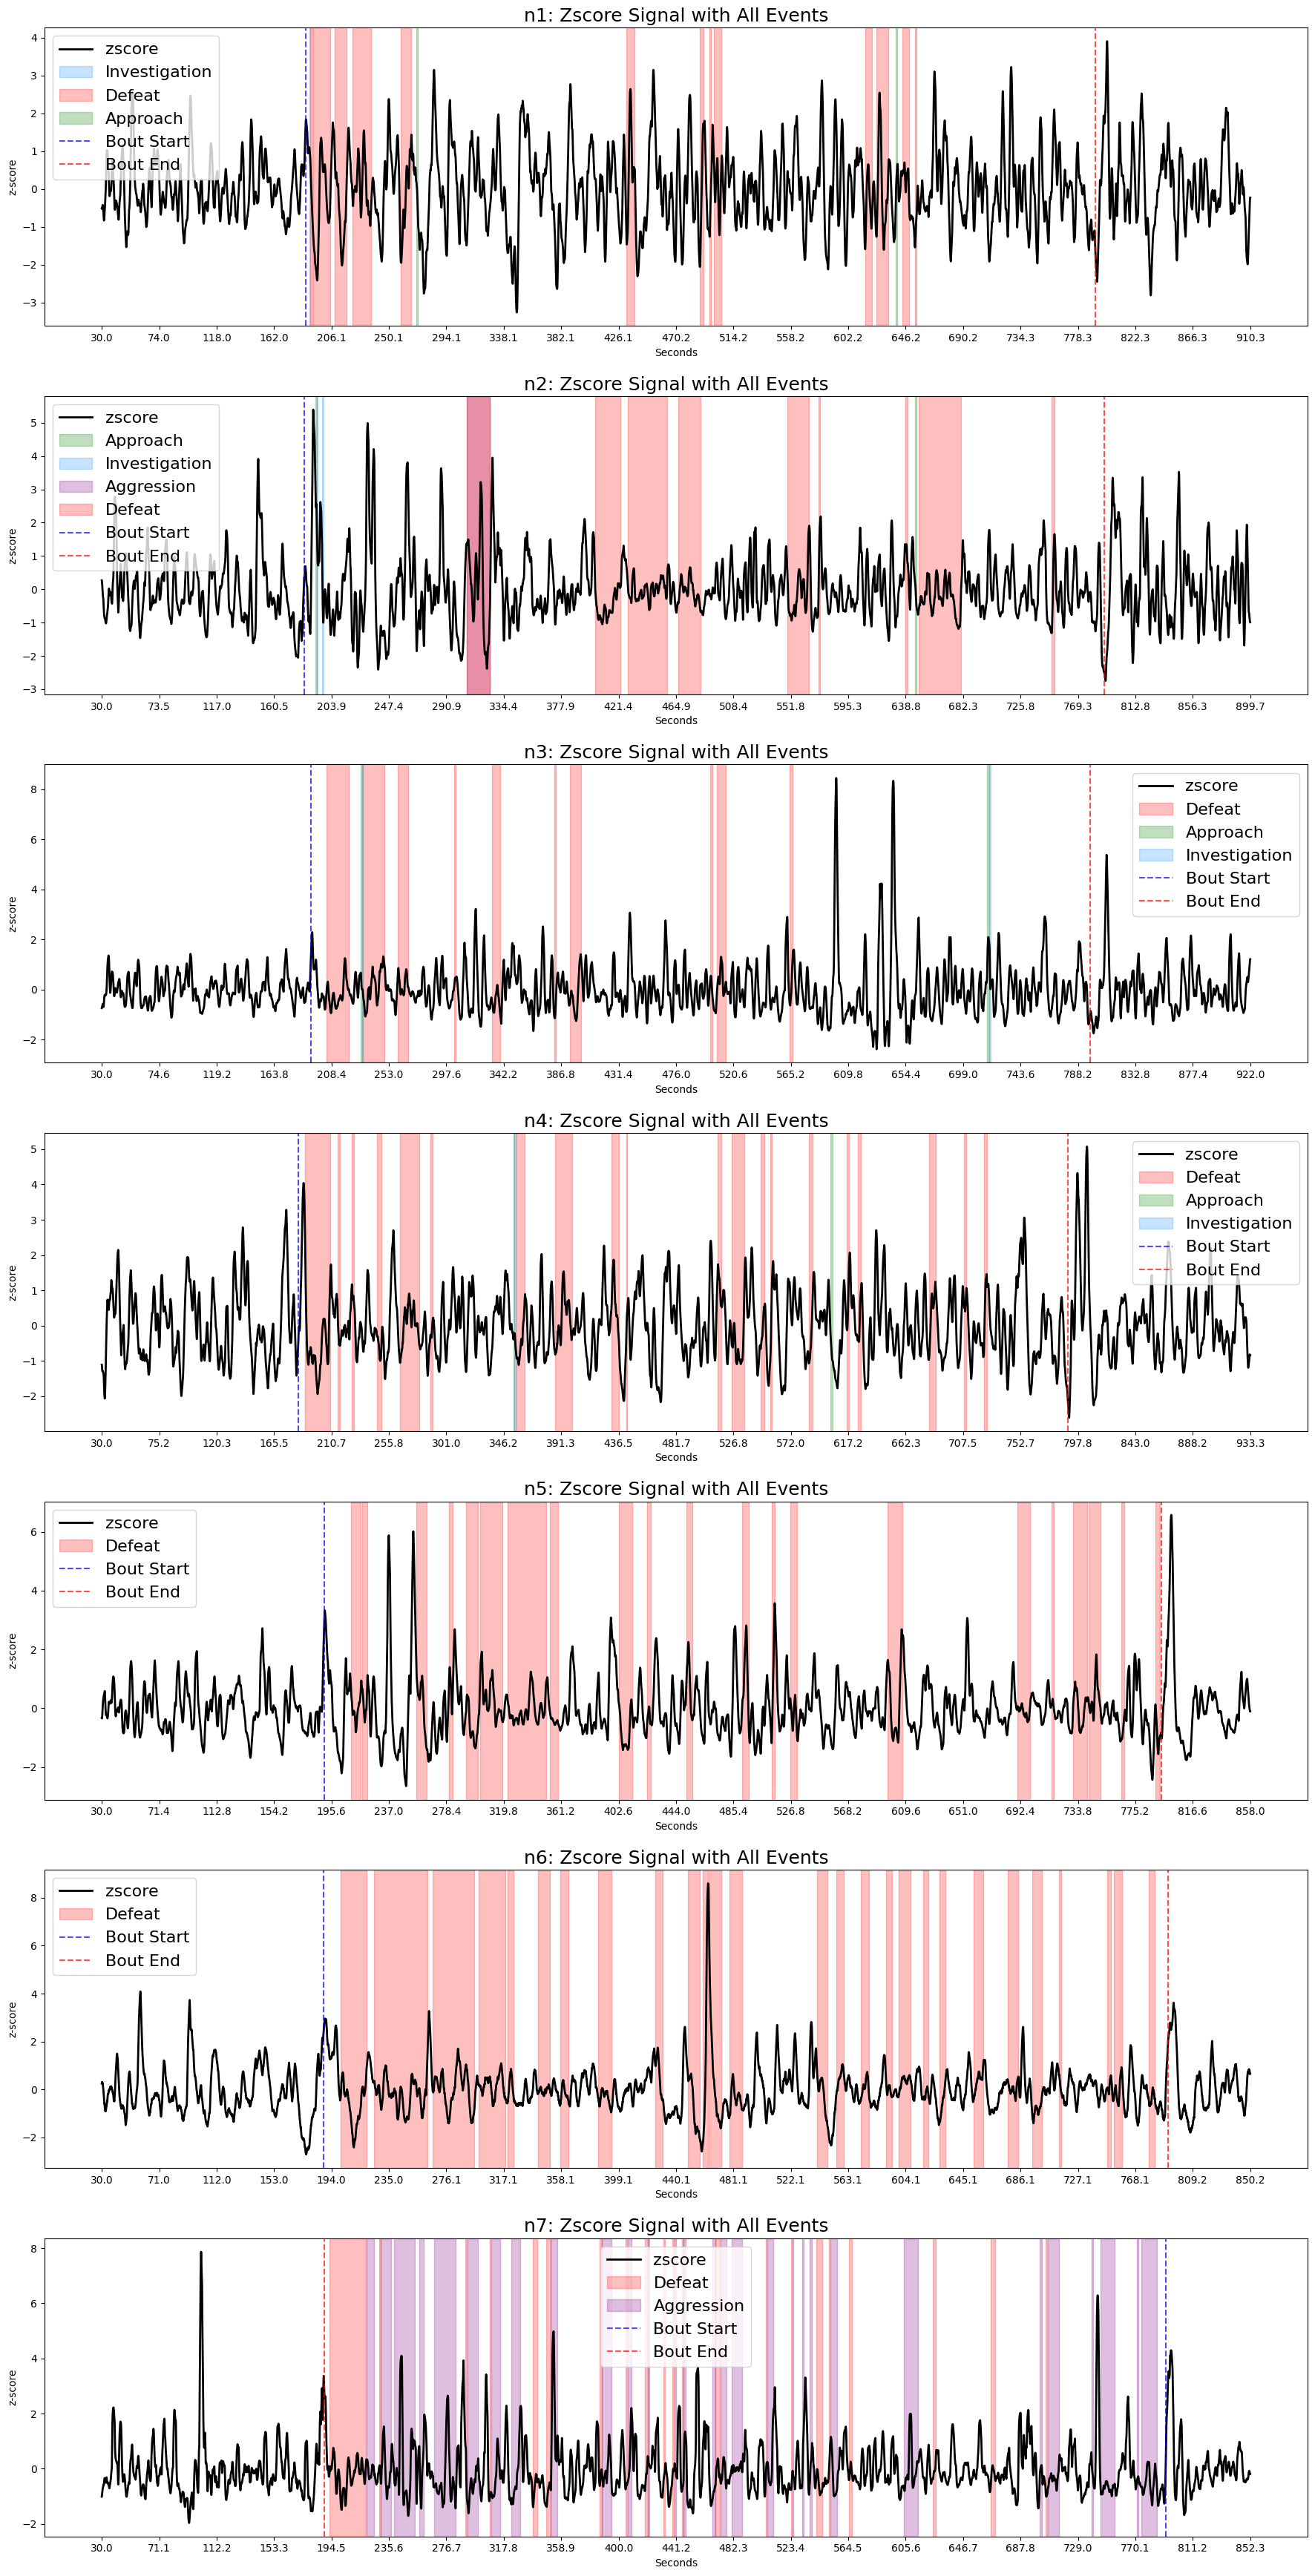

In [ ]:
group_data.d_proc_plot_individual_behavior(behavior_name='all', plot_type='zscore')
